# Rain in Australia
[https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data?select=weatherAUS.csv](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data?select=weatherAUS.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def scatter_plot(dataframe, x_column, y_column, x_max=None, y_max=None):
    """
    Crée un scatter plot entre deux colonnes d'un DataFrame.

    Args:
        dataframe (pd.DataFrame): Le DataFrame contenant les données.
        x_column (str): Le nom de la colonne pour l'axe x.
        y_column (str): Le nom de la colonne pour l'axe y.
        x_max (float or int, optional): La valeur maximale pour l'axe x.
        y_max (float or int, optional): La valeur maximale pour l'axe y.

    Returns:
        None
    """
    x_data = dataframe[x_column]
    y_data = dataframe[y_column]

    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, alpha=0.5, color='blue')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Scatter Plot entre {x_column} et {y_column}')
    
    if x_max is not None:
        plt.xlim(0, x_max)
    if y_max is not None:
        plt.ylim(0, y_max)
    
    plt.grid(True)
    plt.show()

In [3]:
def box_plot(dataframe, x_column, y_column, x_max=None, y_max=None):
    """
    Crée un box plot entre deux colonnes d'un DataFrame.

    Args:
        dataframe (pd.DataFrame): Le DataFrame contenant les données.
        x_column (str): Le nom de la colonne pour l'axe x.
        y_column (str): Le nom de la colonne pour l'axe y.
        x_max (float or int, optional): La valeur maximale pour l'axe x.
        y_max (float or int, optional): La valeur maximale pour l'axe y.

    Returns:
        None
    """
    data_temp = dataframe[[x_column, y_column]]
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_column, y=y_column, data=data_temp)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Box Plot de {y_column} en fonction de {x_column}')
    
    if x_max is not None:
        plt.xlim(0, x_max)
    if y_max is not None:
        plt.ylim(0, y_max)
    
    plt.grid(True)
    plt.show()

In [4]:
def display_nan_proportion(dataframe: pd.DataFrame, dataframe_name: str = "le dataframe"):
    nan_proportions = (dataframe.isna().sum() / len(dataframe)) * 100
    nan_proportions = nan_proportions.sort_values(ascending=False)
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=nan_proportions.values, y=nan_proportions.index, hue=nan_proportions.index, palette='viridis', legend=False)
    plt.xlabel('Proportion de NaN (%)')
    plt.title(f'Proportions de NaN par colonne dans {dataframe_name}')
    plt.gca().invert_yaxis()  # La colonne avec le plus de NaN en bas
    plt.show()

In [5]:
def combine_values(df, column1, column2, verbose=False):
    result = pd.Series(index=df.index)

    for i, row in df.iterrows():
        if pd.isna(row[column1]) and pd.isna(row[column2]):
            result[i] = np.nan
        elif pd.isna(row[column1]):
            result[i] = row[column2]
        elif pd.isna(row[column2]):
            result[i] = row[column1]
        else:
            result[i] = (row[column1] + row[column2]) / 2
    if verbose:
        # Afficher le nombre de NaN dans les colonnes d'entrée et la colonne de sortie
        num_nan_input1 = df[column1].isna().sum()
        num_nan_input2 = df[column2].isna().sum()
        num_nan_output = result.isna().sum()
        print(f"NaN dans {column1}: {num_nan_input1}")
        print(f"NaN dans {column2}: {num_nan_input2}")
        print(f"NaN dans la colonne de sortie: {num_nan_output}")

    return result

In [6]:
weatherAUS = pd.read_csv('weatherAUS.csv')

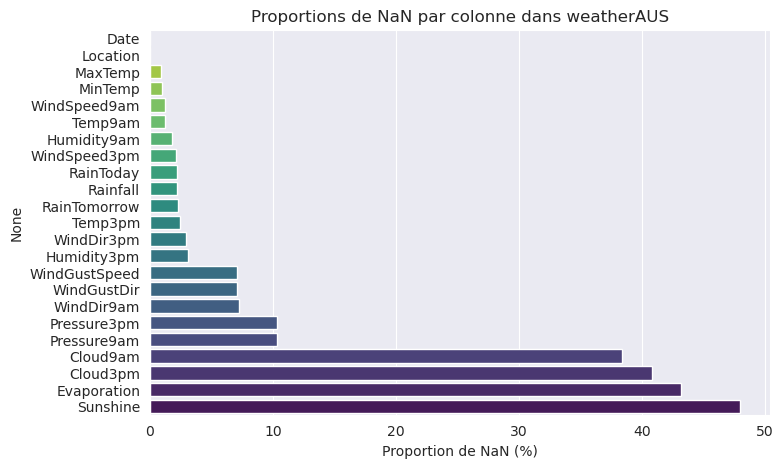

In [7]:
display_nan_proportion(dataframe=weatherAUS, dataframe_name="weatherAUS")

In [8]:
weatherAUS['Temp'] = combine_values(weatherAUS, column1='Temp9am', column2='Temp3pm', verbose=True)
weatherAUS['Humidity'] = combine_values(weatherAUS, column1='Humidity9am', column2='Humidity3pm', verbose=True)
weatherAUS['WindSpeed'] = combine_values(weatherAUS, column1='WindSpeed9am', column2='WindSpeed3pm', verbose=True)
weatherAUS['Pressure'] = combine_values(weatherAUS, column1='Pressure9am', column2='Pressure3pm', verbose=True)
weatherAUS['Cloud'] = combine_values(weatherAUS, column1='Cloud9am', column2='Cloud3pm', verbose=True)
weatherAUS.drop(columns=['Humidity9am', 'Humidity3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure3pm', 'Pressure9am', 'Cloud3pm', 'Cloud9am', 'Temp9am', 'Temp3pm'], inplace=True)

NaN dans Temp9am: 1767
NaN dans Temp3pm: 3609
NaN dans la colonne de sortie: 1129
NaN dans Humidity9am: 2654
NaN dans Humidity3pm: 4507
NaN dans la colonne de sortie: 1887
NaN dans WindSpeed9am: 1767
NaN dans WindSpeed3pm: 3062
NaN dans la colonne de sortie: 1213
NaN dans Pressure9am: 15065
NaN dans Pressure3pm: 15028
NaN dans la colonne de sortie: 14804
NaN dans Cloud9am: 55888
NaN dans Cloud3pm: 59358
NaN dans la colonne de sortie: 51744


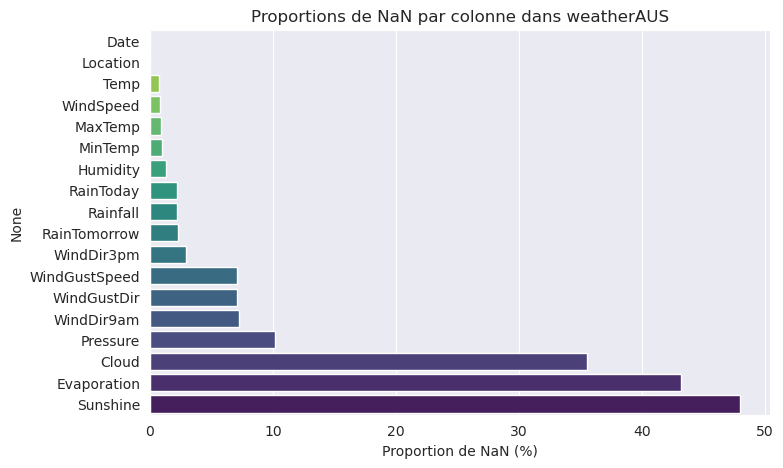

In [9]:
display_nan_proportion(dataframe=weatherAUS, dataframe_name="weatherAUS")

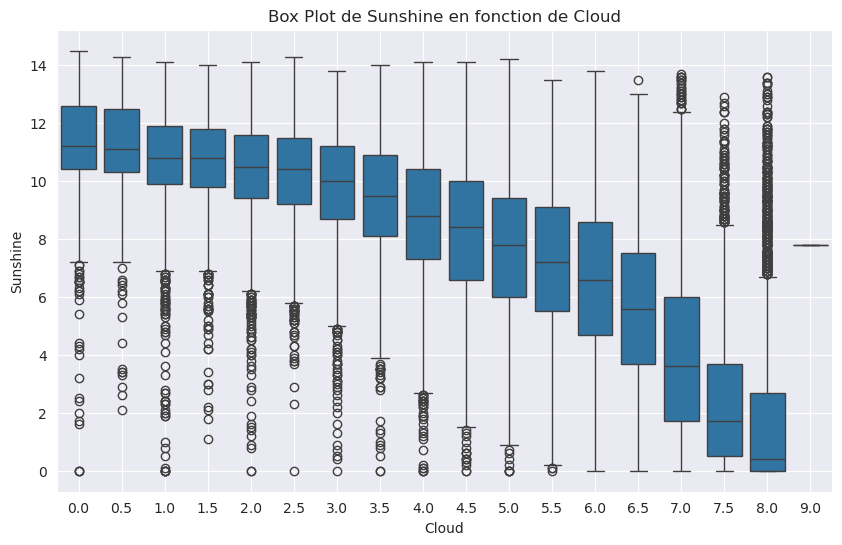

In [10]:
box_plot(dataframe=weatherAUS, x_column="Cloud", y_column="Sunshine")

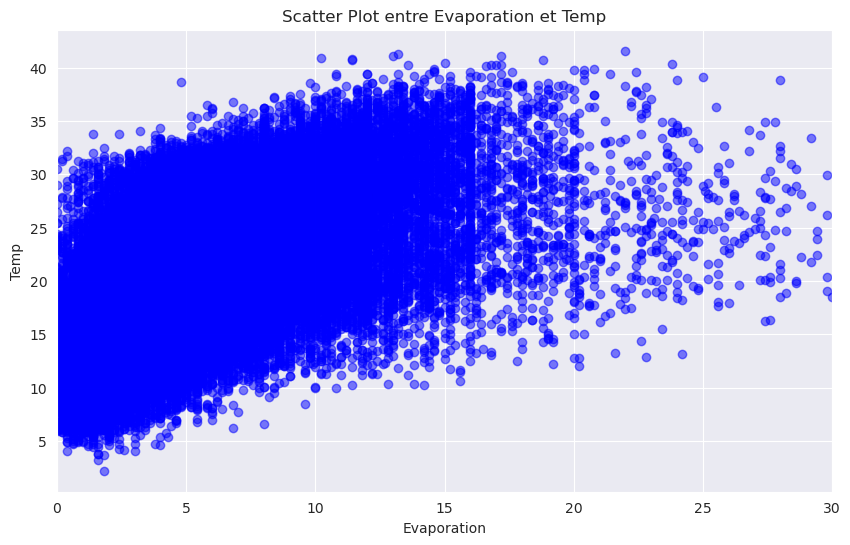

In [11]:
scatter_plot(dataframe=weatherAUS, x_column='Evaporation', y_column='Temp', x_max=30)

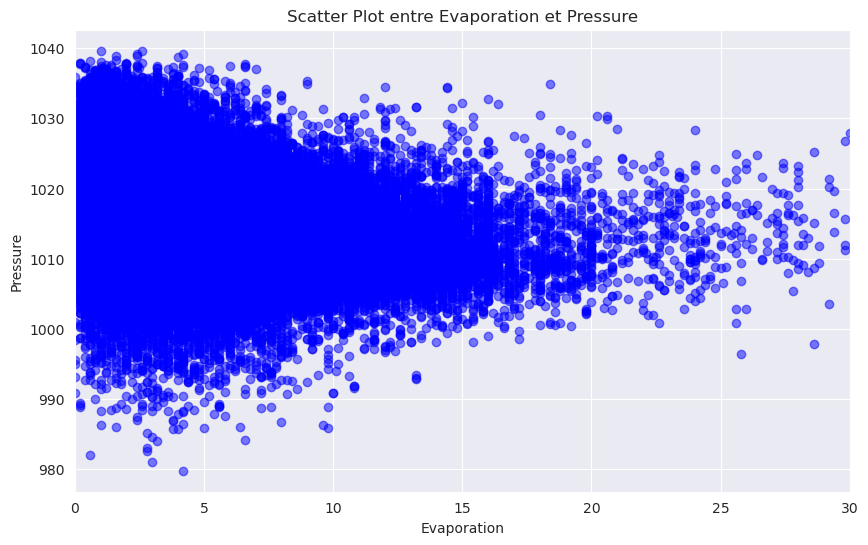

In [12]:
scatter_plot(dataframe=weatherAUS, x_column='Evaporation', y_column='Pressure', x_max=30)

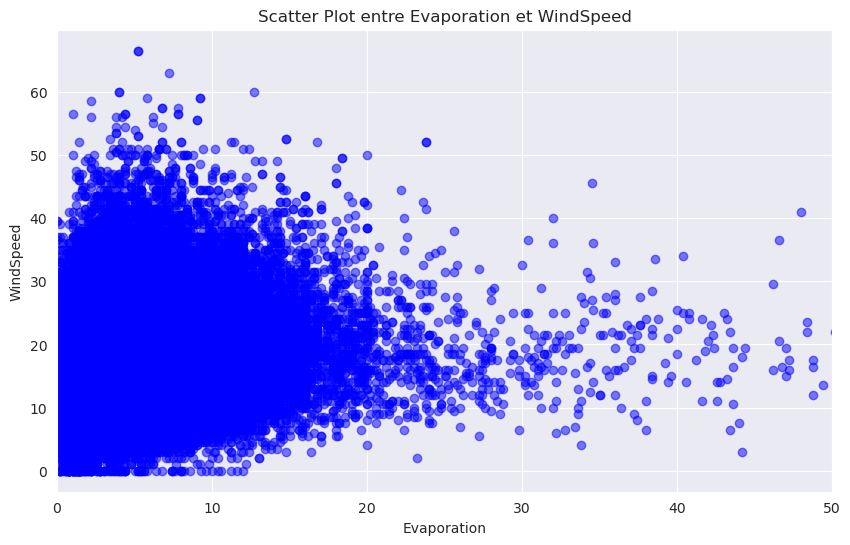

In [13]:
scatter_plot(dataframe=weatherAUS, x_column='Evaporation', y_column='WindSpeed', x_max=50)

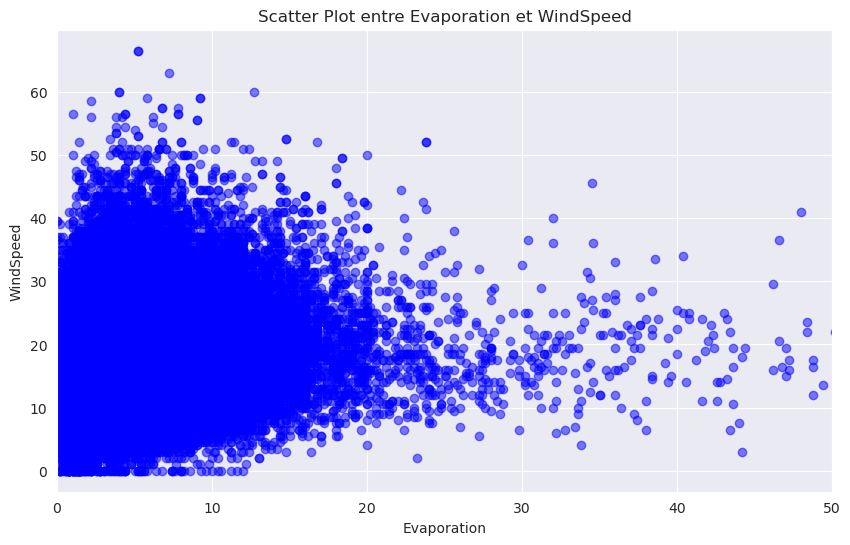

In [14]:
scatter_plot(dataframe=weatherAUS, x_column='Evaporation', y_column='WindSpeed', x_max=50)

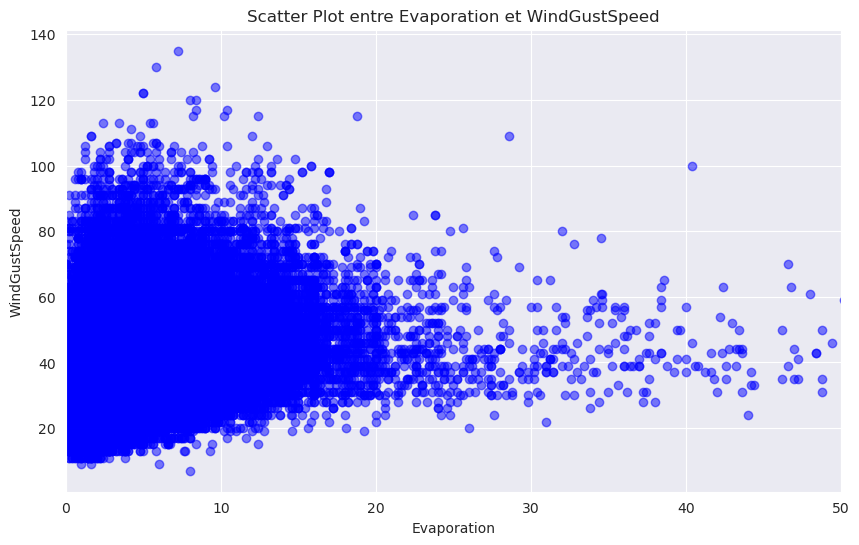

In [15]:
scatter_plot(dataframe=weatherAUS, x_column='Evaporation', y_column='WindGustSpeed', x_max=50)

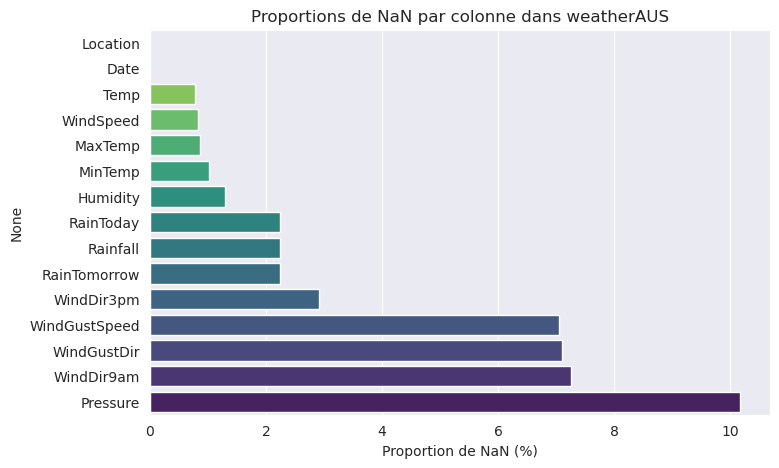

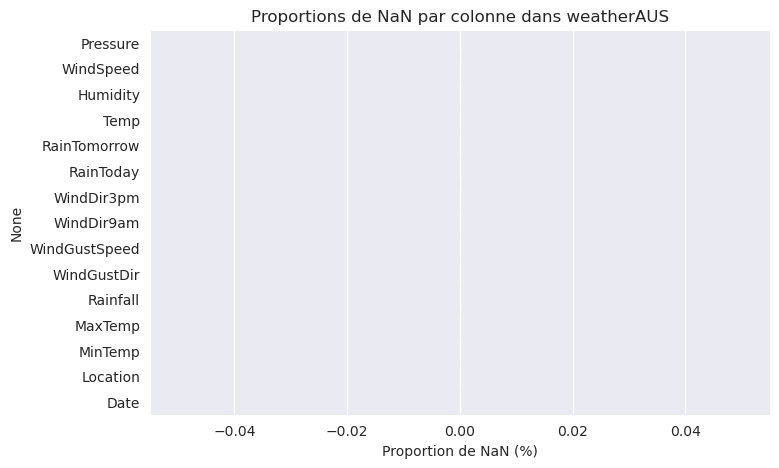

In [16]:
weatherAUS.drop(['Sunshine', 'Cloud', 'Evaporation'], axis=1, inplace=True)
display_nan_proportion(dataframe=weatherAUS, dataframe_name="weatherAUS")
weatherAUS.dropna(inplace=True)
display_nan_proportion(dataframe=weatherAUS, dataframe_name="weatherAUS")

In [17]:
len(weatherAUS)

114002

In [18]:
weatherAUS = pd.get_dummies(weatherAUS, columns=['WindDir3pm', 'WindDir9am', 'WindGustDir', 'Location'])
weatherAUS['RainTomorrow'] = weatherAUS['RainTomorrow'].map({'Yes': True, 'No': False})
weatherAUS['RainToday'] = weatherAUS['RainToday'].map({'Yes': True, 'No': False})
weatherAUS

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,RainToday,RainTomorrow,Temp,Humidity,WindSpeed,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,2008-12-01,13.4,22.9,0.6,44.0,False,False,19.35,46.5,22.0,...,False,False,False,False,False,False,False,False,False,False
1,2008-12-02,7.4,25.1,0.0,44.0,False,False,20.75,34.5,13.0,...,False,False,False,False,False,False,False,False,False,False
2,2008-12-03,12.9,25.7,0.0,46.0,False,False,22.10,34.0,22.5,...,False,False,False,False,False,False,False,False,False,False
3,2008-12-04,9.2,28.0,0.0,24.0,False,False,22.30,30.5,10.0,...,False,False,False,False,False,False,False,False,False,False
4,2008-12-05,17.5,32.3,1.0,41.0,False,False,23.75,57.5,13.5,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,3.5,21.8,0.0,31.0,False,False,15.15,43.0,14.0,...,False,False,True,False,False,False,False,False,False,False
145455,2017-06-21,2.8,23.4,0.0,31.0,False,False,16.25,37.5,12.0,...,False,False,True,False,False,False,False,False,False,False
145456,2017-06-22,3.6,25.3,0.0,22.0,False,False,17.70,38.5,11.0,...,False,False,True,False,False,False,False,False,False,False
145457,2017-06-23,5.4,26.9,0.0,37.0,False,False,19.30,38.5,9.0,...,False,False,True,False,False,False,False,False,False,False


In [19]:
weatherAUS['Date'] = pd.to_datetime(weatherAUS['Date'])
weatherAUS['Month'] = weatherAUS['Date'].dt.month
weatherAUS['Year'] = weatherAUS['Date'].dt.year
weatherAUS.drop(['Date'], axis=1, inplace=True)

In [20]:
weatherAUS

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,RainToday,RainTomorrow,Temp,Humidity,WindSpeed,Pressure,...,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,Month,Year
0,13.4,22.9,0.6,44.0,False,False,19.35,46.5,22.0,1007.40,...,False,False,False,False,False,False,False,False,12,2008
1,7.4,25.1,0.0,44.0,False,False,20.75,34.5,13.0,1009.20,...,False,False,False,False,False,False,False,False,12,2008
2,12.9,25.7,0.0,46.0,False,False,22.10,34.0,22.5,1008.15,...,False,False,False,False,False,False,False,False,12,2008
3,9.2,28.0,0.0,24.0,False,False,22.30,30.5,10.0,1015.20,...,False,False,False,False,False,False,False,False,12,2008
4,17.5,32.3,1.0,41.0,False,False,23.75,57.5,13.5,1008.40,...,False,False,False,False,False,False,False,False,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,False,False,15.15,43.0,14.0,1022.95,...,True,False,False,False,False,False,False,False,6,2017
145455,2.8,23.4,0.0,31.0,False,False,16.25,37.5,12.0,1022.45,...,True,False,False,False,False,False,False,False,6,2017
145456,3.6,25.3,0.0,22.0,False,False,17.70,38.5,11.0,1021.30,...,True,False,False,False,False,False,False,False,6,2017
145457,5.4,26.9,0.0,37.0,False,False,19.30,38.5,9.0,1018.90,...,True,False,False,False,False,False,False,False,6,2017


# Feature selection

In [22]:
feature_dict = {'Lasso':None,
                'SelectKBest':None,
                'RandomForestClassifier':None,
                'RFE':None}


## LASSO

In [23]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.01)
model.fit(X, y)
selected_features_lasso = model.coef_ != 0

In [24]:
X.columns[selected_features_lasso]

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity',
       'WindSpeed', 'Pressure', 'Month'],
      dtype='object')

In [25]:
feature_dict['Lasso'] = X.columns[selected_features_lasso].tolist()

## SelectKBest

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

k_best = SelectKBest(score_func=f_classif, k=15)
fit = k_best.fit(X, y)
selected_features_SelectKBest = fit.get_support()

X.columns[selected_features_SelectKBest]

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'RainToday', 'Temp',
       'Humidity', 'WindSpeed', 'Pressure', 'WindDir9am_E', 'WindDir9am_N',
       'WindGustDir_E', 'Location_AliceSprings', 'Location_Portland',
       'Location_Woomera'],
      dtype='object')

In [27]:
feature_dict['SelectKBest'] = X.columns[selected_features_SelectKBest].tolist()

## RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
feature_importances = model.feature_importances_
feature_importances

array([0.06258189, 0.06209455, 0.06495943, 0.06966476, 0.03156424,
       0.05949988, 0.16454957, 0.05094906, 0.09094136, 0.00314796,
       0.00319312, 0.00317786, 0.00470532, 0.00383784, 0.00400883,
       0.00415637, 0.00420841, 0.00405962, 0.00368131, 0.00372739,
       0.00346265, 0.0033561 , 0.00417712, 0.00437749, 0.00366165,
       0.00302718, 0.00335508, 0.00263096, 0.00541755, 0.00382553,
       0.00457311, 0.00402551, 0.0041162 , 0.00339428, 0.00314832,
       0.00332964, 0.00352598, 0.00369344, 0.00410724, 0.00384195,
       0.00359879, 0.00321326, 0.00291912, 0.00286516, 0.00465678,
       0.00367181, 0.00374697, 0.00386375, 0.00417908, 0.00413885,
       0.00354857, 0.00352247, 0.00400966, 0.0037207 , 0.00468618,
       0.00425282, 0.00395446, 0.00272219, 0.00203737, 0.00118234,
       0.00211244, 0.00262717, 0.00205605, 0.00241349, 0.00179068,
       0.00243479, 0.00181377, 0.00261033, 0.00259899, 0.00143401,
       0.00208858, 0.0027141 , 0.00068167, 0.00158176, 0.00205

In [29]:
feature_importances > 0.01

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True])

In [30]:
X.loc[:, feature_importances > 0.01]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,RainToday,Temp,Humidity,WindSpeed,Pressure,Month,Year
0,13.4,22.9,0.6,44.0,False,19.35,46.5,22.0,1007.40,12,2008
1,7.4,25.1,0.0,44.0,False,20.75,34.5,13.0,1009.20,12,2008
2,12.9,25.7,0.0,46.0,False,22.10,34.0,22.5,1008.15,12,2008
3,9.2,28.0,0.0,24.0,False,22.30,30.5,10.0,1015.20,12,2008
4,17.5,32.3,1.0,41.0,False,23.75,57.5,13.5,1008.40,12,2008
...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,False,15.15,43.0,14.0,1022.95,6,2017
145455,2.8,23.4,0.0,31.0,False,16.25,37.5,12.0,1022.45,6,2017
145456,3.6,25.3,0.0,22.0,False,17.70,38.5,11.0,1021.30,6,2017
145457,5.4,26.9,0.0,37.0,False,19.30,38.5,9.0,1018.90,6,2017


In [31]:
X.columns[feature_importances > 0.01]

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'RainToday', 'Temp',
       'Humidity', 'WindSpeed', 'Pressure', 'Month', 'Year'],
      dtype='object')

In [32]:
feature_dict['RandomForestClassifier'] = X.columns[feature_importances > 0.01].tolist()

## RFE

In [33]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)
selected_features_RFE = fit.support_

In [34]:
selected_features_RFE

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True])

In [35]:
X

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,RainToday,Temp,Humidity,WindSpeed,Pressure,WindDir3pm_E,...,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,Month,Year
0,13.4,22.9,0.6,44.0,False,19.35,46.5,22.0,1007.40,False,...,False,False,False,False,False,False,False,False,12,2008
1,7.4,25.1,0.0,44.0,False,20.75,34.5,13.0,1009.20,False,...,False,False,False,False,False,False,False,False,12,2008
2,12.9,25.7,0.0,46.0,False,22.10,34.0,22.5,1008.15,False,...,False,False,False,False,False,False,False,False,12,2008
3,9.2,28.0,0.0,24.0,False,22.30,30.5,10.0,1015.20,True,...,False,False,False,False,False,False,False,False,12,2008
4,17.5,32.3,1.0,41.0,False,23.75,57.5,13.5,1008.40,False,...,False,False,False,False,False,False,False,False,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,False,15.15,43.0,14.0,1022.95,True,...,True,False,False,False,False,False,False,False,6,2017
145455,2.8,23.4,0.0,31.0,False,16.25,37.5,12.0,1022.45,False,...,True,False,False,False,False,False,False,False,6,2017
145456,3.6,25.3,0.0,22.0,False,17.70,38.5,11.0,1021.30,False,...,True,False,False,False,False,False,False,False,6,2017
145457,5.4,26.9,0.0,37.0,False,19.30,38.5,9.0,1018.90,False,...,True,False,False,False,False,False,False,False,6,2017


In [36]:
X.columns[selected_features_RFE]

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Temp', 'Humidity',
       'WindSpeed', 'Pressure', 'Month', 'Year'],
      dtype='object')

In [37]:
feature_dict['RFE'] = X.columns[selected_features_RFE].tolist()

In [68]:
def categorize_features(features_dict, n_features:int=None, tolist:bool=False, min_occurrences:int=None):
    occurrences = {}
    
    for k,v in features_dict.items():
        for i in v:
            occurrences.setdefault(i, 0)
            occurrences[i] += 1
            
    sorted_occurrences = dict(sorted(occurrences.items(), key=lambda item: item[1], reverse=True))
    
    # Filtrer les caractéristiques en fonction du nombre minimum d'occurrences
    if min_occurrences is None:
        min_occurrences = 0
    sorted_occurrences = {k: v for k, v in sorted_occurrences.items() if v >= min_occurrences}
    
    if n_features:
        sorted_occurrences = dict(list(sorted_occurrences.items())[:n_features])
    if tolist:
        sorted_occurrences = list(sorted_occurrences.keys())
    return sorted_occurrences
        
    

In [71]:
categorize_features(feature_dict, min_occurrences=2, tolist=True)

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'Humidity',
 'WindSpeed',
 'Pressure',
 'Month',
 'Temp',
 'RainToday',
 'Year']

In [77]:
X_col = categorize_features(feature_dict, min_occurrences=2, tolist=True)
X = weatherAUS[X_col]
y = weatherAUS['RainTomorrow']

In [78]:
X

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity,WindSpeed,Pressure,Month,Temp,RainToday,Year
0,13.4,22.9,0.6,44.0,46.5,22.0,1007.40,12,19.35,False,2008
1,7.4,25.1,0.0,44.0,34.5,13.0,1009.20,12,20.75,False,2008
2,12.9,25.7,0.0,46.0,34.0,22.5,1008.15,12,22.10,False,2008
3,9.2,28.0,0.0,24.0,30.5,10.0,1015.20,12,22.30,False,2008
4,17.5,32.3,1.0,41.0,57.5,13.5,1008.40,12,23.75,False,2008
...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,43.0,14.0,1022.95,6,15.15,False,2017
145455,2.8,23.4,0.0,31.0,37.5,12.0,1022.45,6,16.25,False,2017
145456,3.6,25.3,0.0,22.0,38.5,11.0,1021.30,6,17.70,False,2017
145457,5.4,26.9,0.0,37.0,38.5,9.0,1018.90,6,19.30,False,2017


In [76]:
y

0         False
1         False
2         False
3         False
4         False
          ...  
145454    False
145455    False
145456    False
145457    False
145458    False
Name: RainTomorrow, Length: 114002, dtype: bool